In [1]:
# Importing the libraries

import numpy as np # for mathematical operations
import matplotlib.pyplot as plt  # for plotting the graph
import seaborn as sns  # for plotting the graph
import pandas as pd  # for importing the dataset
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv('Salary Prediction dataSet.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,27,Male,Bachelor's,Junior Business Operations Analyst,2,435.395214
1,33,Female,Bachelor's Degree,Junior HR Coordinator,5,521.489417
2,32,Female,Bachelor's Degree,Junior HR Coordinator,3,624.083392
3,32,Female,Bachelor's Degree,Junior HR Coordinator,3,624.083392
4,27,Female,Bachelor's Degree,Front end Developer,0,860.103271


# Data Analysis

In [4]:
# Checking the shape of the dataset
df.shape

(49989, 6)

In [5]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49989 entries, 0 to 49988
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  49989 non-null  int64  
 1   Gender               49989 non-null  object 
 2   Education Level      49989 non-null  object 
 3   Job Title            49989 non-null  object 
 4   Years of Experience  49989 non-null  int64  
 5   Salary               49989 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
# Checking the statistical information of the dataset
df.describe()

,Age,Years of Experience,Salary
count,49989.000000,49989.000000,49989.000000
mean,33.128728,7.630739,115453.958368
std,7.894586,6.118853,52894.089610
min,15.000000,0.000000,435.395214
25%,27.000000,3.000000,68859.400850
50%,31.000000,6.000000,114797.578100
75%,38.000000,11.000000,161276.184800
max,64.000000,35.000000,262122.113900


In [7]:
# Checking the missing values in the dataset
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

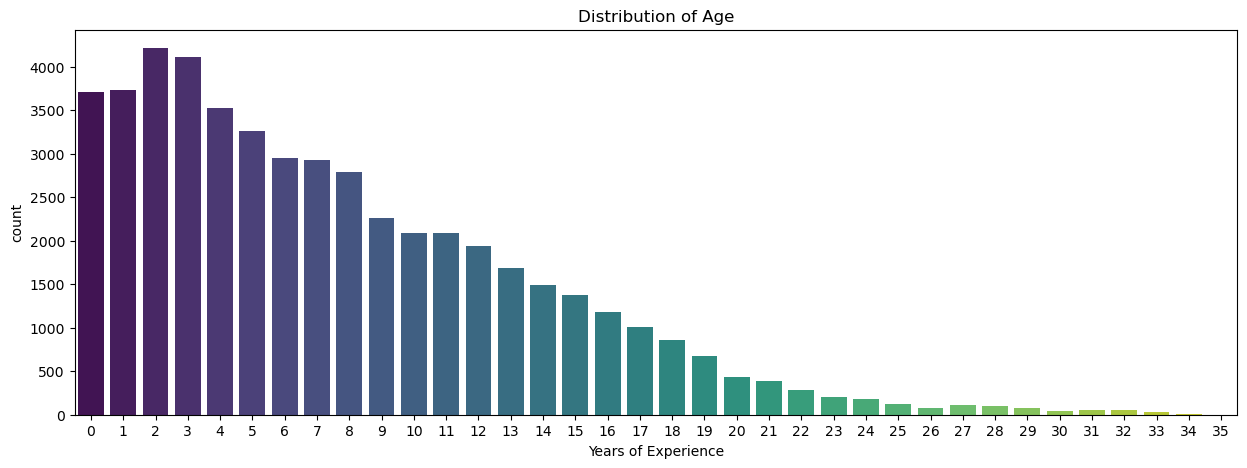

In [9]:
# Year of experience
plt.figure(figsize=(15,5))
sns.countplot(x='Years of Experience',data=df,palette='viridis')
plt.title('Distribution of Age')
plt.show()

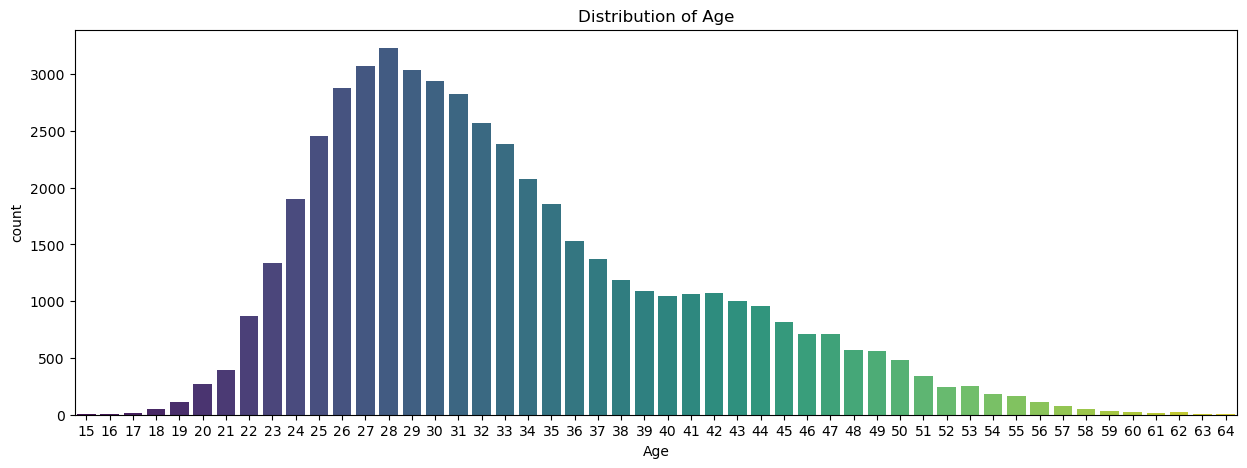

In [11]:
# Distribution of Age
plt.figure(figsize=(15,5))
sns.countplot(x='Age', data=df, palette='viridis')
plt.title('Distribution of Age')
plt.show()

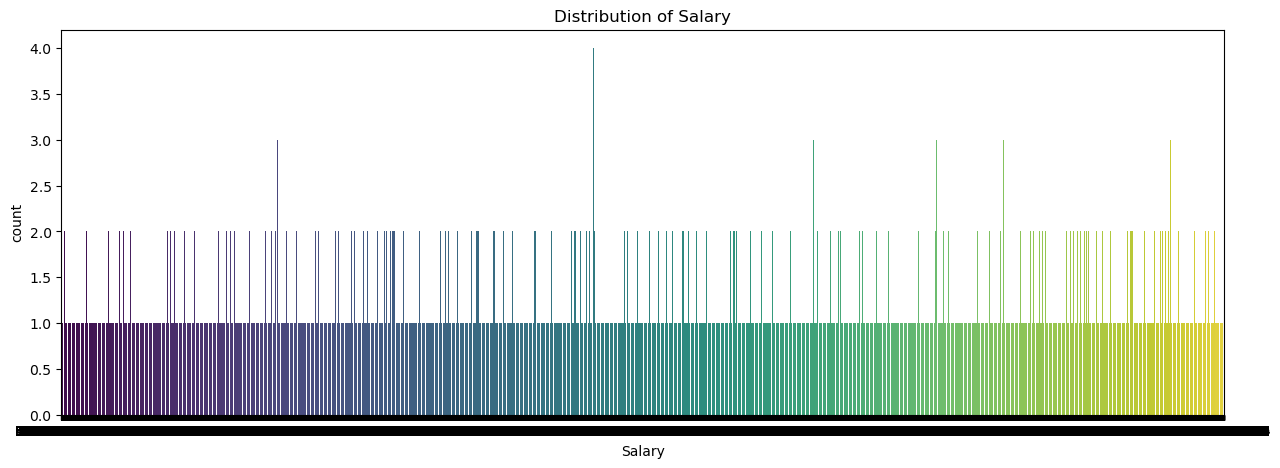

In [12]:
# Distribution of Salary
plt.figure(figsize=(15,5))
sns.countplot(x='Salary', data=df, palette='viridis')
plt.title('Distribution of Salary')
plt.show()

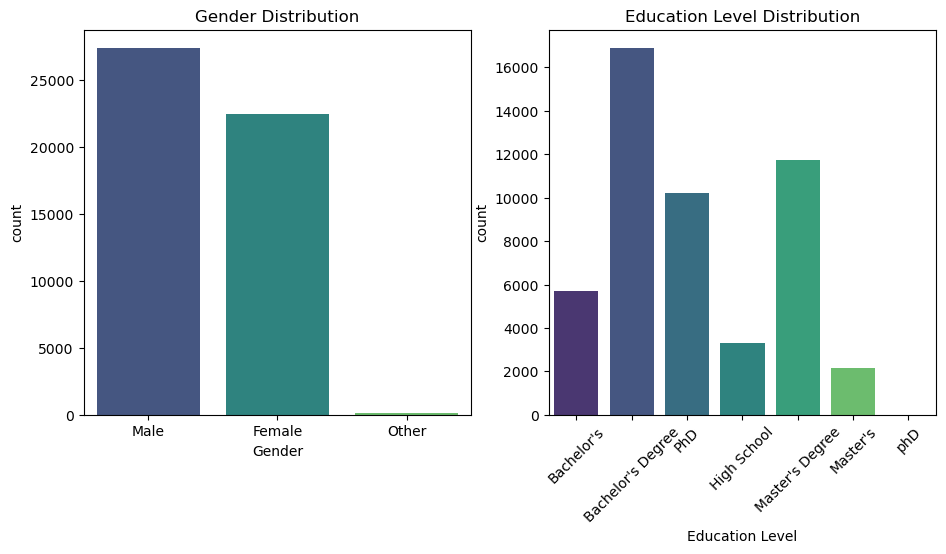

In [15]:
# Count plots for categorical features
plt.figure(figsize=(17,5))
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.subplot(1, 3, 2)
sns.countplot(x='Education Level', data=df, palette='viridis')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

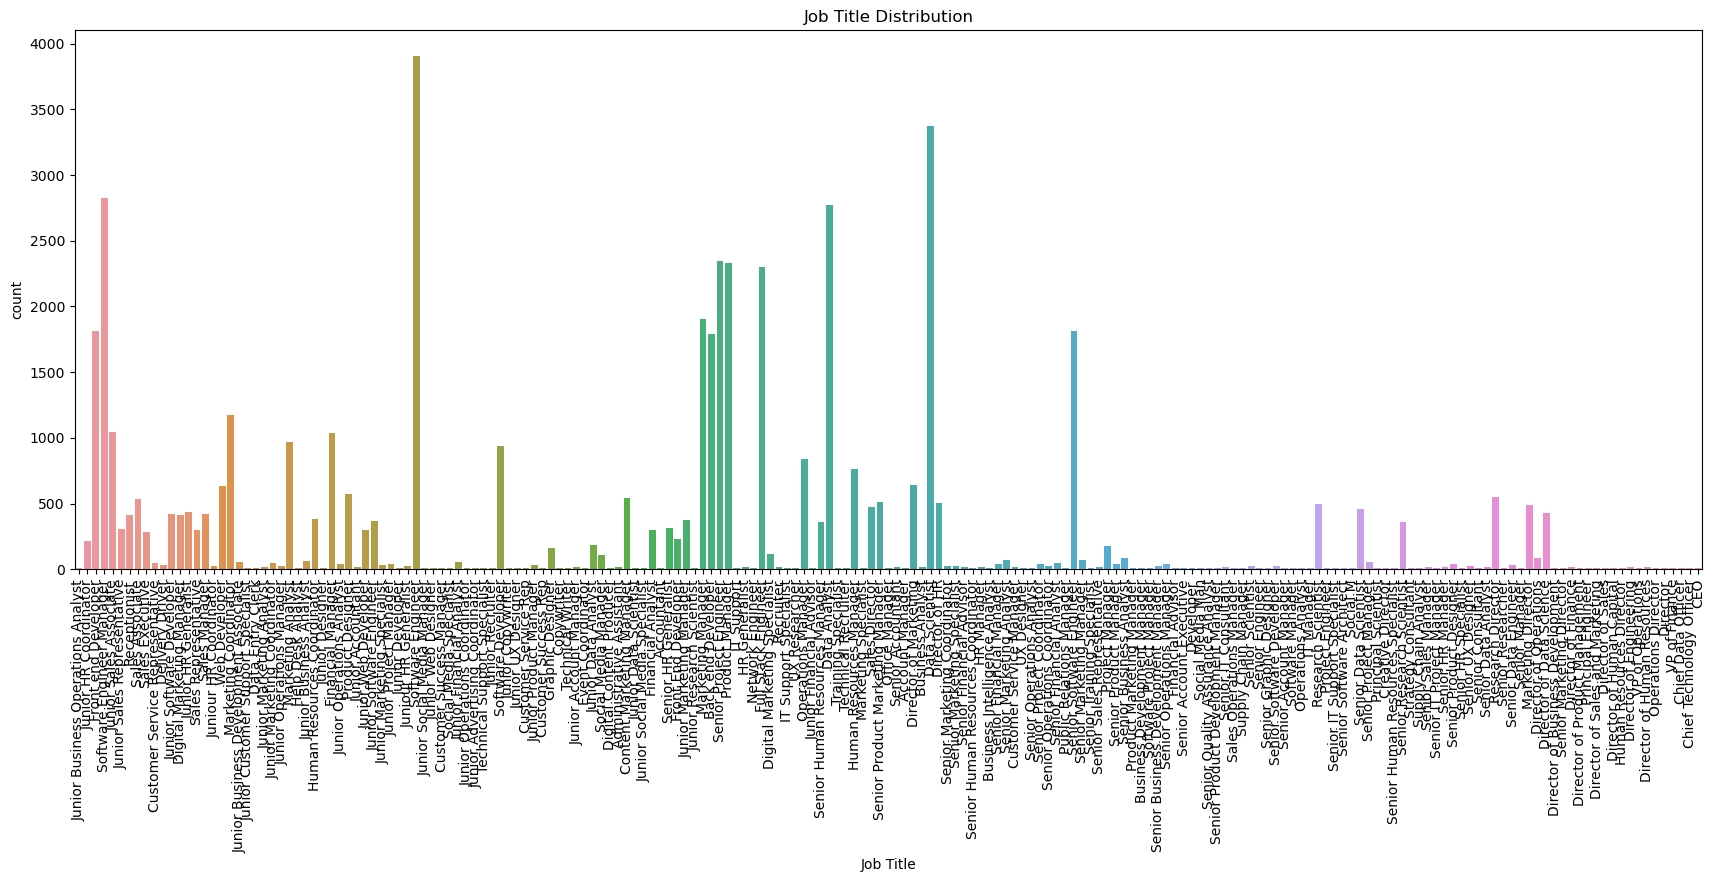

In [18]:
plt.figure(figsize=(21,7))
sns.countplot(x='Job Title', data=df)
plt.title('Job Title Distribution')
plt.xticks(rotation=90)
plt.show()

In [4]:
# High School 
df[df['Education Level'] == 'High School']['Job Title'].value_counts()

Job Title
Junior Sales Associate             1046
Sales Associate                     487
Receptionist                        414
Junior HR Generalist                208
Sales Executive                     197
Junior Sales Representative         193
Sales Manager                       120
Junior HR Coordinator               106
Back end Developer                  103
Senior Project Engineer              57
Sales Representative                 55
Financial Manager                    47
Digital Marketing Manager            45
Senior Software Engineer             45
Customer Service Representative      37
Delivery Driver                      35
Juniour HR Coordinator               27
Front end Developer                  23
Juniour HR Generalist                22
Junior Web Developer                 22
Web Developer                        21
Full Stack Engineer                  17
Name: count, dtype: int64

# Data Cleaning
- Handling the missing values
- Handling Duplicate values
- Ensure data types are correct.


In [19]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [20]:
# Handling the missing values
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [21]:
df = df.dropna()

In [5]:
# Handling Duplicate values
df.duplicated().sum()

6704

In [6]:
# Delete the duplicate values
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [7]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    14639
Master's Degree      10161
PhD                   8811
Bachelor's            4919
High School           2875
Master's              1874
phD                      6
Name: count, dtype: int64

In [8]:
# in education level there is PhD and phD so add together and make it PhD
df['Education Level'] = df['Education Level'].replace('phD', 'PhD')
# make Bachelor's Degree and Bachelor's the same as well as Master's and Master's Degree
df['Education Level'] = df['Education Level'].replace("Bachelor's", "Bachelor's Degree")
df['Education Level'] = df['Education Level'].replace("Master's", "Master's Degree")



In [9]:
# in salary col remove float and convert it into int type
df['Salary'] = df['Salary'].astype(int)
df['Salary']

0           435
1           521
2           624
4           860
5          1868
          ...  
49983    252212
49984    252708
49986    255402
49987    257436
49988    262122
Name: Salary, Length: 43285, dtype: int32

In [10]:
# in job title column, how many each category have more than 500 records
job_title = df['Job Title'].value_counts()
job_title = job_title[job_title > 500]
job_title


Job Title
Software Engineer            3360
Data Scientist               2959
Software Engineer Manager    2428
Data Analyst                 2374
Senior Project Engineer      2037
Product Manager              2009
Full Stack Engineer          1988
Marketing Manager            1643
Back end Developer           1578
Front end Developer          1571
Senior Software Engineer     1571
Marketing Coordinator        1024
Junior Sales Associate        912
Financial Manager             869
Marketing Analyst             859
Software Developer            811
Operations Manager            740
Human Resources Manager       665
Director of Marketing         560
Web Developer                 553
Name: count, dtype: int64

In [11]:
# filter the dataset for the job titles that have more than 400 records
new_df = df[df['Job Title'].isin(job_title.index)]

# Checking the shape of the new dataset
new_df.shape

(30511, 6)

In [13]:
# 
new_df['Education Level'].value_counts()

Education Level
Bachelor's Degree    14103
Master's Degree       9396
PhD                   5832
High School           1180
Name: count, dtype: int64

In [14]:
# what is the highest and lowest of education level in these columns (Age, Years of Experience, Salary)
new_df.groupby('Education Level').agg({'Age': ['min', 'max'], 'Years of Experience': ['min', 'max'], 'Salary': ['min', 'max']})


Age     Years of Experience     Salary        
                  min max                 min max    min     max
Education Level                                                 
Bachelor's Degree  16  58                   0  31    860  262122
High School        17  57                   0  32   7192  176334
Master's Degree    18  62                   0  34  26612  233466
PhD                17  64                   0  35   1868  252195

# Data Preprocessing
- Encoding the categorical features
- Splitting the dataset into training and testing


In [51]:
# Encoding the categorical features
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [31]:
# Encoding the categorical features
import sklearn.preprocessing as preprocessing
categorical_col = ['Gender', 'Education Level', 'Job Title']

uncoded_df = new_df.copy()

label_encoders = {} # dictionary to save the label encoders
for col in categorical_col:
    label_encoders[col] = preprocessing.LabelEncoder()
    uncoded_df[col] = label_encoders[col].fit_transform(uncoded_df[col])

uncoded_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
4,27,0,0,5,0,860
5,25,1,3,18,2,1868
7,21,1,3,18,1,3206
8,25,0,0,5,1,3284
10,26,0,0,5,0,3936


In [32]:
# label encoders
for col in categorical_col:
    print(f"For column '{col}':")
    for category, numeric in enumerate(label_encoders[col].classes_):
        print(f"{category} -> {numeric}")
    print("\n")

For column 'Gender':
0 -> Female
1 -> Male
2 -> Other


For column 'Education Level':
0 -> Bachelor's Degree
1 -> High School
2 -> Master's Degree
3 -> PhD


For column 'Job Title':
0 -> Back end Developer
1 -> Data Analyst
2 -> Data Scientist
3 -> Director of Marketing
4 -> Financial Manager
5 -> Front end Developer
6 -> Full Stack Engineer
7 -> Human Resources Manager
8 -> Junior Sales Associate
9 -> Marketing Analyst
10 -> Marketing Coordinator
11 -> Marketing Manager
12 -> Operations Manager
13 -> Product Manager
14 -> Senior Project Engineer
15 -> Senior Software Engineer
16 -> Software Developer
17 -> Software Engineer
18 -> Software Engineer Manager
19 -> Web Developer




In [33]:
# Splitting the dataset into the Training set and Test set
X = uncoded_df.drop('Salary', axis=1)
y = uncoded_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21357, 5), (9154, 5), (21357,), (9154,))

In [11]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
4,27,0,1,9,0
5,25,1,5,39,2
7,21,1,5,39,1
8,25,0,1,9,1
10,26,0,1,9,0


# Modal training

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


# Models
models = {
    'Bagging Regression': BaggingRegressor(n_estimators=100, max_samples=1.0, max_features=1.0),
    'Extra Trees Regression': ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2),
    'Decision Tree Regression': DecisionTreeRegressor(criterion='friedman_mse', splitter='best'),
    'Random Forest Regression': RandomForestRegressor(max_depth=20,max_features='log2',n_estimators=400),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'),
    'Gradient Boosting Regression': GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=300),
    
}

# Results
results = {}

# Model Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)
    print(f"Model: {name}")

results

Model: Bagging Regression
Model: Extra Trees Regression
Model: Decision Tree Regression
Model: Random Forest Regression
Model: K-Nearest Neighbors Regression
Model: Gradient Boosting Regression


{'Bagging Regression': 0.8967699164226722,
 'Extra Trees Regression': 0.8932001960745323,
 'Decision Tree Regression': 0.8880263477613166,
 'Random Forest Regression': 0.895570483020506,
 'K-Nearest Neighbors Regression': 0.877973136501415,
 'Gradient Boosting Regression': 0.9010551786384817}

In [43]:
# Model Evaluation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Model: {name}")
    print(f"Mean Score: {scores.mean()}")
    print("\n")
    

Model: Bagging Regression
Mean Score: 0.8891388974712715


Model: Extra Trees Regression
Mean Score: 0.8840200652329399


Model: Decision Tree Regression
Mean Score: 0.8764221708916533


Model: Random Forest Regression
Mean Score: 0.8884386695018371


Model: K-Nearest Neighbors Regression
Mean Score: 0.8652965111695569


Model: Gradient Boosting Regression
Mean Score: 0.8966410075573152




In [44]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model Evaluation
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print("\n")

    




Model: Bagging Regression
Mean Squared Error: 254478601.7654765
Mean Absolute Error: 10566.37274626832
R2 Score: 0.8967699164226722


Model: Extra Trees Regression
Mean Squared Error: 263278531.12141806
Mean Absolute Error: 10736.225661741364
R2 Score: 0.8932001960745323


Model: Decision Tree Regression
Mean Squared Error: 276032891.46742654
Mean Absolute Error: 10971.909723239665
R2 Score: 0.8880263477613166


Model: Random Forest Regression
Mean Squared Error: 257435396.18544248
Mean Absolute Error: 10715.723472301559
R2 Score: 0.895570483020506


Model: K-Nearest Neighbors Regression
Mean Squared Error: 300815658.81601924
Mean Absolute Error: 11575.152108367927
R2 Score: 0.877973136501415


Model: Gradient Boosting Regression
Mean Squared Error: 243914747.7116264
Mean Absolute Error: 10435.505599590737
R2 Score: 0.9010551786384817




# Save the model

The best model is Gradient Boosting Regression with an accuracy of 0.9010551786384817
Percentage of accuracy is 0.9010551786384817


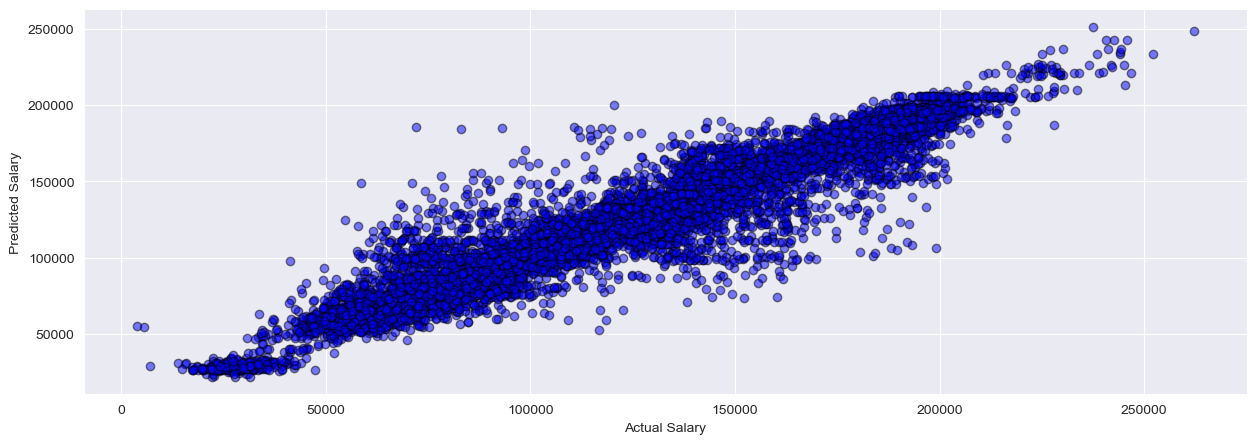

In [53]:
# Model Selection
best_model = max(results, key=results.get)
print(f"The best model is {best_model} with an accuracy of {results[best_model]}")

# Saving the best model
import joblib
# joblib.dump(models[best_model], f"{best_model}.pkl")
# 
# #Save the encoders
# joblib.dump(label_encoders, 'label_encoders.pkl')

# Loading the model
loaded_model = joblib.load(f"../{best_model}.pkl")

# Predicting the test set results
y_pred = loaded_model.predict(X_test)
print(f"Percentage of accuracy is {loaded_model.score(X_test, y_test)}")

# Visualising the Test set results using Histogram
plt.figure(figsize=(15,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted', linewidths=1, edgecolors='black')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()





# Hypothesis Testing
- ask the question
- formulate the null hypothesis
- formulate the alternative hypothesis
- determine the test statistic
- determine the level of significance
- make a decision
- interpret the decision
- draw a conclusion

## Asking a Question

Does the level of education affect salary?

## Hypothesis

Individuals with more years of experience will have higher salaries compared to those with fewer years of experience.


## Formulating the Null Hypothesis

H0: Individuals with more years of experience will have the same salaries compared to those with fewer years of experience.

## Formulating the Alternative Hypothesis

H1: Individuals with more years of experience will have higher salaries compared to those with fewer years of experience.


## Determining the Test Statistic

t-test for independent samples

## Determining the Level of Significance

alpha = 0.05

## Making a Decision

if p-value < alpha, reject the null hypothesis
if p-value > alpha, fail to reject the null hypothesis


In [14]:
# Hypothesis Testing
from scipy.stats import ttest_ind

# Splitting the dataset into two groups
more_years = df[df['Years of Experience'] > 10]['Salary']
less_years = df[df['Years of Experience'] <= 10]['Salary']

# Performing the t-test
t_stat, p_value = ttest_ind(more_years, less_years)
t_stat, p_value


(178.71988943340716, 0.0)

In [15]:
# Conclusion
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
    print("Individuals with more years of experience have higher salaries compared to those with fewer years of experience.")
else:
    print("Fail to reject the null hypothesis")
    print("There is not enough evidence to suggest that individuals with more years of experience have higher salaries compared to those with fewer years of experience.")
    


Reject the null hypothesis
Individuals with more years of experience have higher salaries compared to those with fewer years of experience.


## Interpret the Decision

if p-value < alpha, there is enough evidence to suggest that individuals with more years of experience have higher salaries compared to those with fewer years of experience
if p-value > alpha, there is not enough evidence to suggest that individuals with more years of experience have higher salaries compared to those with fewer years of experience

## Drawing a Conclusion

Individuals with more years of experience have higher salaries compared to those with fewer years of experience.
